In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import neighbors, metrics
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.ensemble import VotingClassifier
import pickle
from xgboost import plot_importance

In [2]:
# Reading the dataframe
feat_df = pd.read_csv('distance_features_15.csv')
# Removing the id and label from the df
wlabel_df = feat_df.drop(['id','emotion'], axis = 1)

In [3]:
# Applying PCA on the data
pca = PCA(n_components = 7)
graph_table = pca.fit_transform(wlabel_df)
pca.explained_variance_ratio_

array([0.43933155, 0.25137009, 0.09195195, 0.05848463, 0.03838128,
       0.02803731, 0.02267905])

In [4]:
# Plot function of two features from the PCA
def plot_2data(table):
    fig, ax = plt.subplots()
    colors = {0:'r',1:'b',2:'c',3:'g',4:'y',5:'k'}
    colors_emotions = {0:'SURPRISE', 1:'ANGER',2:'HAPPY',3:'SADNESS',4:'DISGUST',5:'FEAR'}
    for i in range(len(table)):
        ax.scatter(table[i:,1], table[i:,4], color = colors[feat_df['emotion'][i]], label = '')
    # plt.legend(colors_emotions)
    plt.title('PCA of features where no.of components =7')
    plt.rcParams["figure.figsize"] = (10,7)

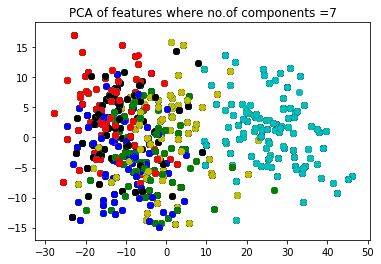

In [5]:
# Plotting the scatter plot
plot_2data(graph_table)

In [6]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(wlabel_df, feat_df['emotion'], test_size = 0.2, random_state = 0, stratify = feat_df['emotion'])

In [7]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# Parameters to search for in KNN model
parameters_knn = {
    'weights': ['uniform', 'distance'],
    'leaf_size':[1,2,3,4,5],
    'algorithm':['auto', 'ball_tree','kd_tree','brute'],
    'n_jobs':[-1],
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
}

In [67]:
# Initialize the GridSearch for KNN
model_KNNCV_1 = GridSearchCV(KNeighborsClassifier(n_jobs = -1), parameters_knn, cv=10, n_jobs =-1, verbose = True)
# Fitting the data to the parameters
model_KNNCV_1.fit(X_train, y_train)
# Printing the best score found
print(model_KNNCV_1.score(X_train, y_train))
# Printing the parameters for whom the best score was found
print(model_KNNCV_1.best_params_)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  2.5min


0.6555555555555556
{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 12, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  3.0min finished
/home/nikhil/Semester_II/Natural_ML/testvenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [127]:
# Initializing the model with found parameters
model_knn = KNeighborsClassifier(weights='uniform',
                                 leaf_size=1,
                                 n_neighbors =12,
                                 algorithm = 'auto',
                                 n_jobs = -1)
# Fitting the model to our data
model_knn.fit(X_train, y_train)
# Accuracy Score
accuracy_score(model_knn.predict(X_test), y_test)

0.5274725274725275

In [128]:
# Parameters for SVM
parameters_svm = {
    'kernel':('linear', 'rbf','poly', 'sigmoid'),
    'C':(1,0.25,0.5,0.75),
    'gamma': (1,2,3,'auto'),
    'decision_function_shape':('ovo','ovr'),
    'shrinking':(True,False)
}

In [75]:
model_SVMCV_1 = GridSearchCV(SVC(), parameters_svm, cv=10, n_jobs =-1,verbose = True)
model_SVMCV_1.fit(X_train, y_train)
print(model_SVMCV_1.score(X_train, y_train))
print(model_SVMCV_1.best_params_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.8s


0.6888888888888889
{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'sigmoid', 'shrinking': True}


[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    4.2s finished
/home/nikhil/Semester_II/Natural_ML/testvenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# Initializing a model with found parameters
model_svm_1 = SVC(C= 1,
                  decision_function_shape= 'ovo',
                  gamma= 'auto',
                  kernel= 'sigmoid',
                  shrinking= True,
                 probability = True)
model_svm_1.fit(X_train, y_train)
accuracy_score(model_svm_1.predict(X_test), y_test)

0.6703296703296703

In [130]:
# Parameters for Random Forest
parameters_rf = {
   'criterion':['gini','entropy'],
   'n_estimators':[10,20,30,40,50,60,70,80,90,100],
   'min_samples_leaf':[1,2,3],
   'min_samples_split':[3,4,5,6,7],
   'random_state':[123],
   'n_jobs':[-1],
   'max_features':[None, 'auto','sqrt','log2'],
   'bootstrap':[True, False],
    'class_weight':['balanced_subsample','balanced']
}

In [79]:
model_RFCV_1 = GridSearchCV(RandomForestClassifier(n_jobs = -1), parameters_rf, cv=5, n_jobs =-1, verbose = True)

model_RFCV_1.fit(X_train, y_train)
print(model_RFCV_1.score(X_train, y_train))
print(model_RFCV_1.best_params_)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

0.9972222222222222
{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40, 'n_jobs': -1, 'random_state': 123}


In [131]:
# Initializing the model with found parameters
model_rf = RandomForestClassifier(criterion= 'entropy',
                                  n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=5,
                                  random_state=123,
                                  n_jobs=-1,
                                  max_features='auto',
                                  bootstrap=True,
                                  class_weight='balanced_subsample')
model_rf.fit(X_train, y_train)
accuracy_score(model_rf.predict(X_test), y_test)

0.5934065934065934

In [132]:
# Parameters for XGB
parameters_xgb = {
   "eta": [0.05, 0.075, 0.1, 0.15, 0.2],
   "subsample": [0.6, 0.8, 1.0],
   "colsample_bytree": [0.6, 0.8, 1.0],
   "max_depth":[3,4,5,6],
   "gamma" : [0, 1, 2, 3, 4],
   "n_estimators":[250,500],
   "max_delta_step": [0,2,4,6,8],
   "min_child_weight": [0,5,10,15],
   "objective": ['multi:softmax','multi:softprob'],
   "n_jobs":[-1]
   }

In [60]:
# Searching through the parameters
model_xgbcv_1 = GridSearchCV(xgb(n_jobs=-1), parameters_xgb, cv=2, n_jobs=-1, verbose = True)

model_xgbcv_1.fit(X_train, y_train)
print(model_xgbcv_1.score(X_train, y_train))
print(model_xgbcv_1.best_params_)

Fitting 2 folds for each of 72000 candidates, totalling 144000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

1.0
{'colsample_bytree': 1.0, 'eta': 0.05, 'gamma': 0, 'max_delta_step': 2, 'max_depth': 6, 'min_child_weight': 0, 'n_estimators': 500, 'n_jobs': -1, 'objective': 'multi:softmax', 'subsample': 0.6}


In [9]:
# Initializing and predicting using found parameters
model_xgb = xgb(eta=0.05,
                gamma=0,
                max_delta_step=2,
                max_depth=6,
                min_child_weight=0,
                n_estimators=500,
                objective='multi:softmax',
                subsample=0.6,
                colsample_bytree=1,
                n_jobs = -1)
model_xgb.fit(X_train, y_train)
accuracy_score(model_xgb.predict(X_test), y_test)

0.6153846153846154

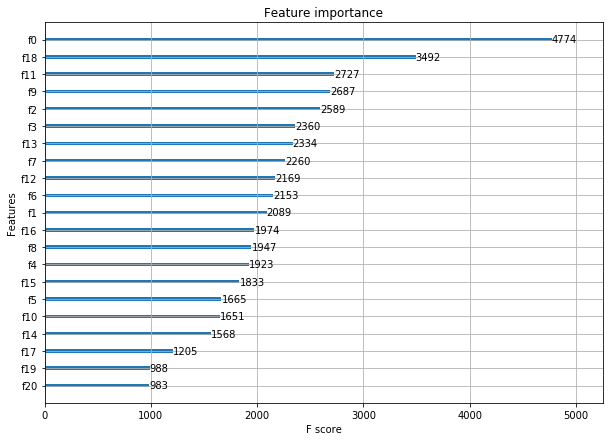

In [134]:
plot_importance(model_xgb)

In [135]:
# Parameters for MLP
parameters_mlp = {
    'solver':['adam','lbfgs', 'sgd'],
    'learning_rate' : ['adaptive','constant','invscaling'],
    'activation':['tanh','relu','logistic'],
    'early_stopping': [True],
    'max_iter': [1000,1100,1200,1300,1400],
    'alpha': 10.0 ** -np.arange(1, 10),
    'hidden_layer_sizes':np.arange(5, 15),
    'random_state':[0,1,2,3]
}

In [73]:
# Searching through the parameters
model_MLPCV_1 = GridSearchCV(MLPClassifier(), parameters_mlp, cv=2, n_jobs =-1,verbose = True)

model_MLPCV_1.fit(X_train, y_train)
print(model_MLPCV_1.score(X_train, y_train))
print(model_MLPCV_1.best_params_)

Fitting 2 folds for each of 48600 candidates, totalling 97200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 231 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 731 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1431 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 2331 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 3431 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4731 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6231 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7931 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 9831 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 11931 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 14231 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 17425 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 22825 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 28625 tasks  

0.9861111111111112
{'activation': 'relu', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': 9, 'learning_rate': 'adaptive', 'max_iter': 1200, 'random_state': 0, 'solver': 'lbfgs'}


In [10]:
# Initializing and predicting using found parameters
model_mlp = MLPClassifier(solver='adam',
                          learning_rate = 'adaptive',
                          alpha=1e-5,
                          random_state=1,
                          hidden_layer_sizes=(6,5),
                          activation='tanh',
                          max_iter=500)
model_mlp.fit(X_train, y_train)
accuracy_score(model_mlp.predict(X_test), y_test)

/home/nikhil/Semester_II/Natural_ML/testvenv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6153846153846154

In [11]:
model_vote = VotingClassifier(estimators=[('xgb', model_xgb), ('mlp', model_mlp), ('svm',model_svm_1)],
                             voting='soft', weights =[1,1,3])

In [12]:
model_vote.fit(X_train, y_train)
accuracy_score(model_vote.predict(X_test), y_test)

/home/nikhil/Semester_II/Natural_ML/testvenv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6703296703296703

In [15]:
with open('finalVotingModel.pkl','wb') as fp:
    pickle.dump(model_vote,fp)

In [16]:
with open('finalScaler.pkl','wb') as fp:
    pickle.dump(scaler, fp)

In [139]:
print(metrics.classification_report(y_test,model_vote.predict(X_test)))
print(metrics.confusion_matrix(y_test,model_vote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.50      0.64      0.56        14
           2       0.91      0.95      0.93        21
           3       0.53      0.69      0.60        13
           4       0.62      0.36      0.45        14
           5       0.55      0.43      0.48        14

    accuracy                           0.66        91
   macro avg       0.64      0.63      0.63        91
weighted avg       0.66      0.66      0.65        91

[[11  0  0  0  1  3]
 [ 1  9  0  1  1  2]
 [ 0  0 20  0  1  0]
 [ 0  4  0  9  0  0]
 [ 0  3  2  4  5  0]
 [ 3  2  0  3  0  6]]


In [140]:
# Reading the dataframe
feat_df_new = pd.read_csv('final_features_15.csv')
feat_df_new = feat_df_new.dropna().reset_index(drop = True)
# Removing the id and label from the df
wlabel_df_new = feat_df_new.drop(['subject_identifier','emotion'], axis = 1)

In [141]:
# Splitting the data into train and test data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(wlabel_df_new, feat_df_new['emotion'], test_size = 0.2, random_state = 0, stratify = feat_df_new['emotion'])
# Scaling the data
scaler_new = StandardScaler()
scaler_new.fit(X_train_new)
X_train_new = scaler_new.transform(X_train_new)
X_test_new = scaler_new.transform(X_test_new)

In [142]:
# Fitting the model to our data
model_knn.fit(X_train_new, y_train_new)
# Accuracy Score
print(accuracy_score(model_knn.predict(X_test_new), y_test_new))
# Fitting the model to our data
model_svm_1.fit(X_train_new, y_train_new)
# Accuracy Score
print(accuracy_score(model_svm_1.predict(X_test_new), y_test_new))
# Fitting the model to our data
model_rf.fit(X_train_new, y_train_new)
# Accuracy Score
print(accuracy_score(model_rf.predict(X_test_new), y_test_new))
# Fitting the model to our data
model_xgb.fit(X_train_new, y_train_new)
# Accuracy Score
print(accuracy_score(model_xgb.predict(X_test_new), y_test_new))
# Fitting the model to our data
model_mlp.fit(X_train_new, y_train_new)
# Accuracy Score
print(accuracy_score(model_mlp.predict(X_test_new), y_test_new))


0.25274725274725274
0.31868131868131866
0.38461538461538464
0.3626373626373626
0.6593406593406593


/home/nikhil/Semester_II/Natural_ML/testvenv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


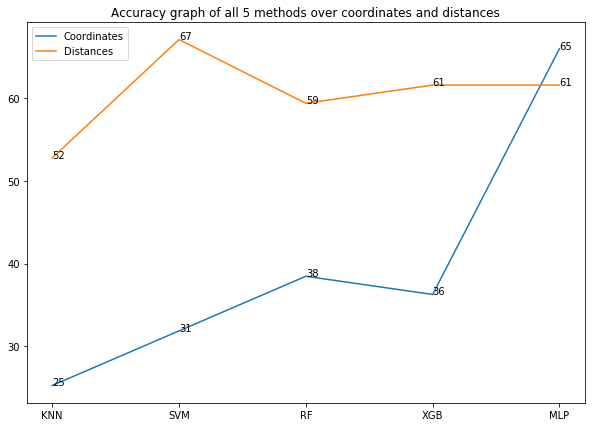

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(0,10)
plt.plot(xAxis,without_dist)
for i,j in zip(xAxis,without_dist):
    ax.annotate(str(int(j)),xy=(i,j))
plt.plot(xAxis,with_dist)
for i,j in zip(xAxis,with_dist):
    ax.annotate(str(int(j)),xy=(i,j))
plt.legend(['Coordinates','Distances'])
plt.title('Accuracy graph of all 5 methods over coordinates and distances')
plt.show()